# Testing notebook

Here we test different implemented algorithms

## Basic Block Matching

In [4]:
from block_matching import disp
import block_matching
from skimage import io, color
import matplotlib.pyplot as plt
from mode_filter import mode_filter
import numpy as np
from importlib import reload

reload(block_matching)

<module 'block_matching' from '/Users/pierreadorni/Documents/depth-estimation/noml/block_matching.py'>

In [5]:
Ig = io.imread('teddy/im2.png')
Id = io.imread('teddy/im6.png')

Iggray = color.rgb2gray(Ig)
Idgray = color.rgb2gray(Id)

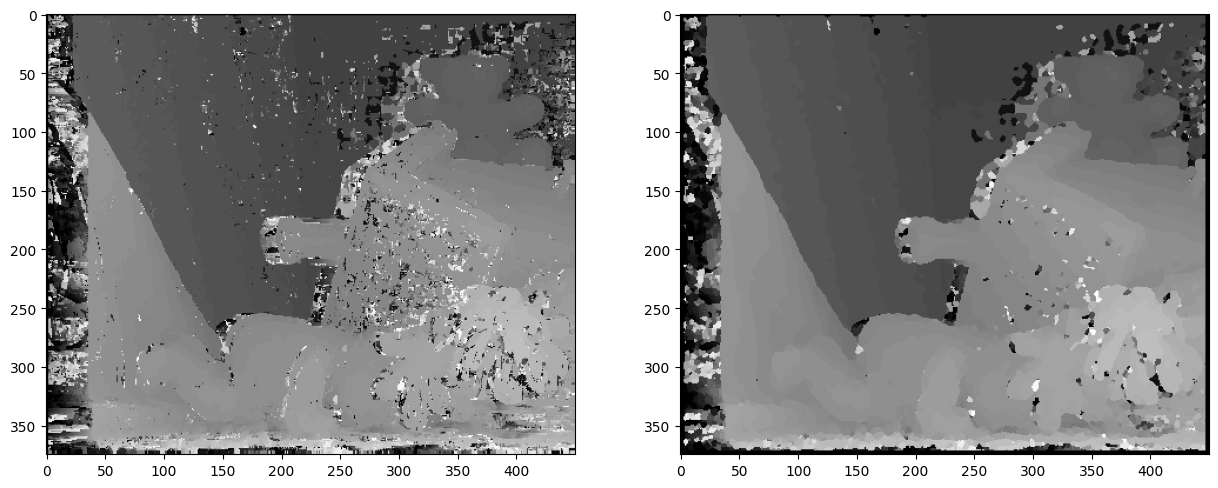

In [6]:
bm_disp_map = disp(Iggray, Idgray, 60)
filtered_bm_disp_map = mode_filter(bm_disp_map, 5)
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(bm_disp_map, cmap='gray')
ax[1].imshow(filtered_bm_disp_map, cmap='gray')

## Weighted window

### Yoon Kweon implementation

In [7]:
from yoon_kweon import yoon_kweon_diss, our_diss
import yoon_kweon
reload(yoon_kweon)

<module 'yoon_kweon' from '/Users/pierreadorni/Documents/depth-estimation/noml/yoon_kweon.py'>

In [8]:
i_ref_lab = color.rgb2lab(Ig)
i_tgt_lab = color.rgb2lab(Id)

yk_disp_map = yoon_kweon_diss(Ig, Id, i_ref_lab, i_tgt_lab, block_size=3)

100%|██████████| 375/375 [00:25<00:00, 14.61it/s]


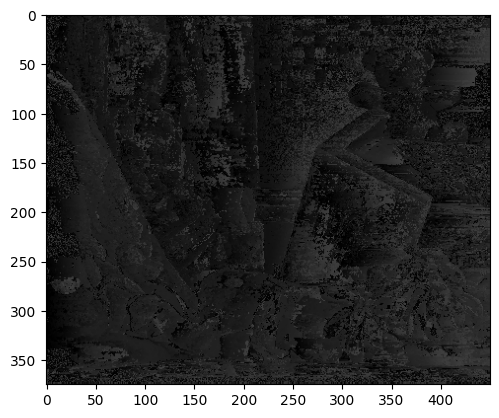

In [9]:
plt.imshow(yk_disp_map, cmap='gray')

Looking at the results, the implementation is bugged. We need to investigate it.

### Our implementation

In [38]:
from yoon_kweon import our_diss
import yoon_kweon
reload(yoon_kweon)

<module 'yoon_kweon' from '/Users/pierreadorni/Documents/depth-estimation/noml/yoon_kweon.py'>

100%|██████████| 375/375 [02:55<00:00,  2.13it/s]


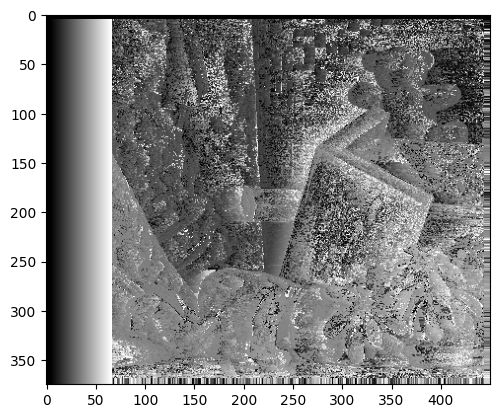

In [39]:
aw_disp_map = our_diss(Ig, Id, i_ref_lab, i_tgt_lab, block_size=11)
plt.imshow(aw_disp_map, cmap='gray')

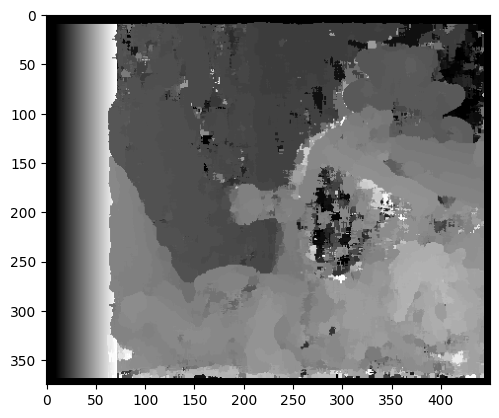

In [41]:
# apply mode filter
aw_disp_map_filtered = mode_filter(aw_disp_map, 11)
plt.imshow(aw_disp_map_filtered, cmap='gray')

C'est vraiment très très mauvais hein